In this notebook we show how are produced the contour plots that are present on the document
for doing this, we use the kde samples produced in the notebook "Amsterdam_models.ipynb" that have been presaved in .pickle format

The grid for the interpolation is composed by 1 million points equispaced points
in longitude and latitude

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contextily as cx
import pickle
from copy import deepcopy
import matplotlib.colors as mcolors
UTM_CRS = "epsg:28992"

In [2]:
# perimeter city points in longitude and latitude
min_long = 115503.976
max_long = 129771.255
min_lat = 478827.935
max_lat = 492001.720

#building a grid of point for sampling the resulting KDEs
xx_utm = np.linspace(min_long, max_long, 1000)
yy_utm = np.linspace(min_lat, max_lat, 1000)
xg_utm, yg_utm = np.meshgrid(xx_utm,yy_utm)
grid_coords_utm = np.c_[xg_utm.ravel(), yg_utm.ravel()]

In [3]:
#loading the samples extracted from the respective KDEs in the notebook
samples_fixedKDE_2D = pickle.load(open('samples_fixed_kde', 'rb'))
samples_VKDE_2D_alpha05 = pickle.load(open('samples_VKDE_2D_alpha05', 'rb'))
samples_VKDE_2D = pickle.load(open('samples_VKDE_2D', 'rb'))

**Fixed bandwidth 2D kde countourplot**

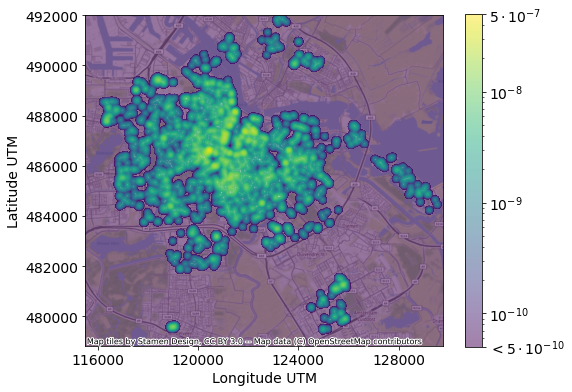

In [4]:
# minAx=5e-10
# maxAx=5e-7
minAx=5e-10
maxAx=5e-7
z = deepcopy(samples_fixedKDE_2D)

fig, ax = plt.subplots(figsize=(8,8))
z[z<minAx] = minAx
levs = np.geomspace(minAx,maxAx, 100)

plane = ax.contourf(xg_utm, yg_utm, z, levs, norm=mcolors.LogNorm() ,alpha=0.5)

cx.add_basemap(ax, crs=UTM_CRS)
cb = plt.colorbar(plane, shrink=0.6, ticks=[5e-10,1e-9, 1e-8, 1e-7, 5e-7])
cb.ax.tick_params(labelsize=14)
cb.ax.set_yticklabels(['$<5\cdot10^{-10}$','$10^{-10}$','$10^{-9}$','$10^{-8}$','$5\cdot10^{-7}$']) 
cb.ax.yaxis.offsetText.set(size=14)
ax.set_xlabel("Longitude UTM", fontsize=14)
ax.set_ylabel("Latitude UTM", fontsize=14)
ax.set_xticks([116000,120000,124000,128000])
ax.tick_params(labelsize=14)
ax.yaxis.offsetText.set(size=14)
plt.tight_layout()

**Variable bandwidth 2D KDE contourplot. Alpha=0.5, global optimal bandwidth**

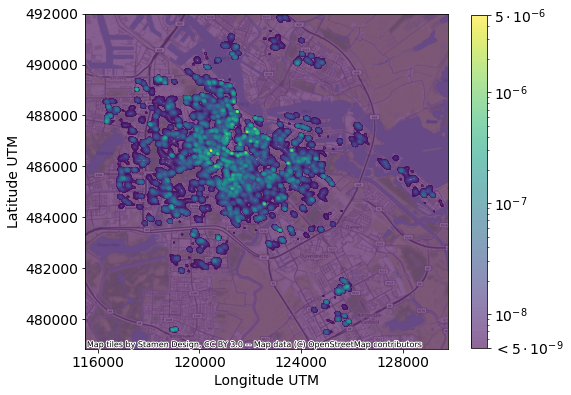

In [5]:
minAx=5e-9
maxAx=5e-6
z = deepcopy(samples_VKDE_2D_alpha05)

fig, ax = plt.subplots(figsize=(8,8))
z[z<minAx] = minAx
levs = np.geomspace(minAx,maxAx, 100)

plane = ax.contourf(xg_utm, yg_utm, z, levs, norm=mcolors.LogNorm(), alpha=0.6)

cx.add_basemap(ax, crs=UTM_CRS)
cb = plt.colorbar(plane, shrink=0.6, ticks=[5e-9,1e-8,1e-7,1e-6,5e-6])
cb.ax.tick_params(labelsize=14)
cb.ax.set_yticklabels(['$<5\cdot10^{-9}$','$10^{-8}$','$10^{-7}$','$10^{-6}$','$5\cdot10^{-6}$']) 
# cb.ax.set_yticklabels(['$10^{-10}$','$10^{-9}$','$10^{-8}$','$10^{-7}$']) 
cb.ax.yaxis.offsetText.set(size=14)
ax.set_xticks([116000,120000,124000,128000])
ax.set_xlabel("Longitude UTM", fontsize=14)
ax.set_ylabel("Latitude UTM", fontsize=14)
ax.tick_params(labelsize=14)
ax.yaxis.offsetText.set(size=14)
plt.tight_layout()

**Variable bandwidth 2D KDE contourplot. Alpha and glob_bw hyperparameters both selected through cross-validatin approach**

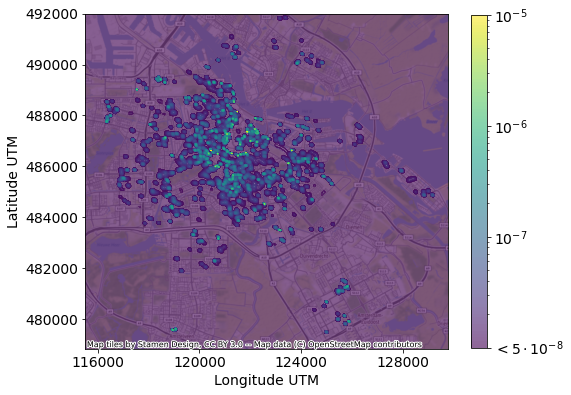

In [6]:
minAx=1e-8
maxAx=1e-5
z = deepcopy(samples_VKDE_2D)

fig, ax = plt.subplots(figsize=(8,8))
z[z<minAx] = minAx
#levs = np.geomspace(z.min(),z.max(), 100)
levs = np.geomspace(minAx,maxAx, 100)

plane = ax.contourf(xg_utm, yg_utm, z, levs, norm=mcolors.LogNorm() ,alpha=0.6)

cx.add_basemap(ax, crs=UTM_CRS)
cb = plt.colorbar(plane, shrink=0.6, ticks=[1e-8,1e-7,1e-6,1e-5])
cb.ax.tick_params(labelsize=14)
cb.ax.set_yticklabels(['$<5\cdot10^{-8}$','$10^{-7}$','$10^{-6}$','$10^{-5}$']) 
cb.ax.yaxis.offsetText.set(size=14)
ax.set_xlabel("Longitude UTM", fontsize=14)
ax.set_ylabel("Latitude UTM", fontsize=14)
ax.set_xticks([116000,120000,124000,128000])
ax.tick_params(labelsize=14)
ax.yaxis.offsetText.set(size=14)
plt.tight_layout()

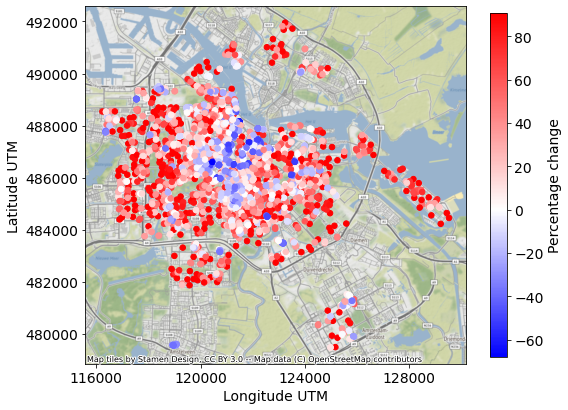

In [8]:
scatter_df = pd.read_pickle('scatterplot_df')
twoslopenorm_perc = mcolors.TwoSlopeNorm(vmin=scatter_df['inc_dec_perc'].min(), vcenter=0, vmax=scatter_df['inc_dec_perc'].max())
fig, ax = plt.subplots(figsize=(8,8))
scatter = plt.scatter(scatter_df['start_longitude_utm'], scatter_df['start_latitude_utm'], 
                      s=30, c=scatter_df['inc_dec_perc'], norm=twoslopenorm_perc, cmap='bwr')
cx.add_basemap(ax, crs=UTM_CRS)
cb.ax.tick_params(labelsize=14)
cb = plt.colorbar(scatter, shrink=0.62)
cb.ax.tick_params(labelsize=14)
cb.set_label('Percentage change', fontsize=14)
plt.tight_layout()
ax.set_xlabel('Longitude UTM', fontsize=14)
ax.set_ylabel('Latitude UTM', fontsize=14)
ax.set_xticks([116000,120000,124000,128000])

ax.tick_params(labelsize=14)
ax.yaxis.offsetText.set(size=14)
plt.tight_layout()